# Linear Discriminant Analysis (LDA)

---

Name: Shantanu Shaji

PRN: 24070126165

AIML - C1

---

### Theory

#### LDA contains two criteria:

- Maximize the distance between means of classes.
- Minimize the variation within each class.

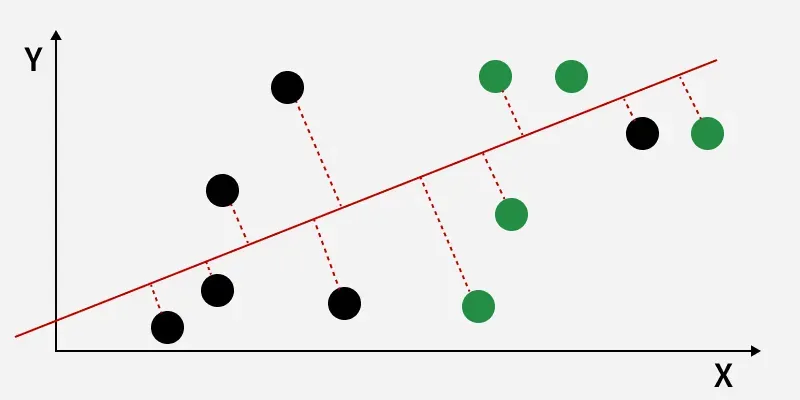
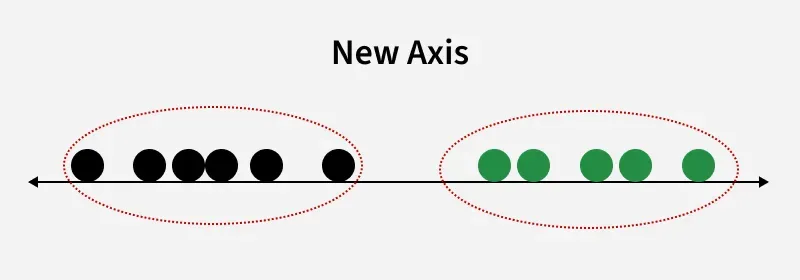

#### Steps for LDA:

- Compute Mean Vectors for each Class.

- Compute Covariance for each Class.

- Compute Within Class Scatter Matrix (S<sub>W</sub>)

- Compute Between Class Scatter Matrix (S<sub>B</sub>)

- Find the EigenValues and Vectors

- Compute Dot Product

Transform d Dimensions of dataset into (Class - 1) Dimensions

### Implementation

##### Setup

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

rState = 1

In [2]:
taxis_df = sns.load_dataset('taxis')
taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [9]:
taxis_df.describe()
taxis_df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

##### Preprocessing

In [4]:
df = taxis_df.dropna()

In [ ]:
enco = LabelEncoder() #encoding output column
df.loc[:,'payment'] = enco.fit_transform(df.loc[:,'payment']) # Card or Cash

0       1
1       0
2       1
3       1
4       1
       ..
6428    1
6429    1
6430    0
6431    1
6432    1
Name: payment, Length: 6341, dtype: int64

In [ ]:
X = df[['distance', 'fare', 'pickup_borough', 'dropoff_borough']]
X = pd.get_dummies(X, drop_first=True) #Encoding Categorical Columns if any.

y = df['payment']

In [20]:
#Splitting
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, random_state=rState, test_size=0.2)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

##### Training the model

In [22]:
rfc = RandomForestClassifier(random_state=rState)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Accuracy on Raw Input: ", metrics.accuracy_score(y_test, y_pred))

Accuracy on Raw Input:  0.6579984239558707


#### LDA Through Library

In [50]:
def lda_lib(n):
    lda_transformer = LinearDiscriminantAnalysis(n_components = n)
    X_train_LDA = lda_transformer.fit_transform(X_train, y_train)
    X_test_LDA = lda_transformer.transform(X_test)

    rfc.fit(X_train_LDA, y_train)
    y_pred_LDA = rfc.predict(X_test_LDA)
    print(f"Accuracy on LDA {n} Component(s) Input: ", metrics.accuracy_score(y_test, y_pred_LDA))

max_components = min(X_train.shape[1], len(set(y_train)) - 1)

for i in range(1, max_components + 1):
    lda_lib(i)

Accuracy on LDA 1 Component(s) Input:  0.6367218282111899


#### LDA Through Manual Implementation

In [57]:
# Work with Numpy arrays, not Pandas DataFrames
X_np = X.values
y_np = y.values

In [61]:
# Finding Classes
classes = np.unique(y_np)
classes

array([0, 1, 2])

In [62]:
overall_mean = np.mean(X_np, axis=0)

class_means = {}
for c in classes:
    class_means[c] = np.mean(X_np[y_np == c], axis=0)

class_means

IndexError: boolean index did not match indexed array along axis 1; size of axis is 13 but size of corresponding boolean axis is 1

### On Wine Dataset

#### Setup

In [44]:
from sklearn.datasets import load_wine
wine = load_wine()

X = pd.DataFrame(wine.data)
y = pd.DataFrame(wine.target)

wine.feature_names
display(X.head() , y.value_counts())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


0
1    71
0    59
2    48
Name: count, dtype: int64

In [46]:
display(X.isnull().sum(), y.isnull().sum(), X.describe())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

0    0
dtype: int64

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
#Splitting
from sklearn.model_selection import train_test_split
X_train_uns, X_test_uns, y_train_uns, y_test_uns = train_test_split(X, y)

#Scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
